In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Simple Linear Regression

With simple linear regression we want to model our data as follows: <br/>
y = B0 + B1 × x

This is a line where y is the output variable we want to predict, x is the input variable
we know and B0 and B1 are coefficients that we need to estimate that move the line around.
Technically, **B0 is called the intercept** because it determines where the line intercepts the y-axis.
In machine learning we can call this the bias, because it is added to offset all predictions that
we make. The **B1 term is called the slope** because it defines the slope of the line or **how x
translates into a y value before we add our bias**. <br/><br/>
We can start off by estimating the value for B1 as: <br/>
<img src="SLR_B1_expression.jpg" >

The xi and yi refer to
the fact that we need to repeat these calculations across all values in our dataset and i refers to
the i’th value of x or y. We can calculate B0 using B1 and some statistics from our dataset, as
follows: <br/><br/>
**B0 = mean(y) − B1 × mean(x)**

In [44]:
x = np.array([1,2,4,3,5])
y = np.array([1,3,3,2,5])

# Estimating The Slope (B1)

In [45]:
print("The mean of x : ", x.mean())
print("The mean of y : ", y.mean())
print("Residual of each x value from the mean : ", (x - x.mean()))
print("Residual of each y value from the mean : ", (y - y.mean()))
print("Multiplication of the x and y residuals from their means : ", (x - x.mean()) * (y - y.mean()))
B1 = ((x - x.mean()) * (y - y.mean())).sum() / ((x - x.mean())**2).sum()
print("The value of our slope B1 : ", B1)

The mean of x :  3.0
The mean of y :  2.8
Residual of each x value from the mean :  [-2. -1.  1.  0.  2.]
Residual of each y value from the mean :  [-1.8  0.2  0.2 -0.8  2.2]
Multiplication of the x and y residuals from their means :  [ 3.6 -0.2  0.2 -0.   4.4]
The value of our slope B1 :  0.8


# Estimating The Intercept (B0)

In [46]:
B0 = y.mean() - B1 * x.mean()
print("The value of our intercept B0 : ", B0)

The value of our intercept B0 :  0.39999999999999947


# Making Predictions

In [47]:
predictions = B0 + B1 * x
print("Predictions : ", predictions)

Predictions :  [1.2 2.  3.6 2.8 4.4]


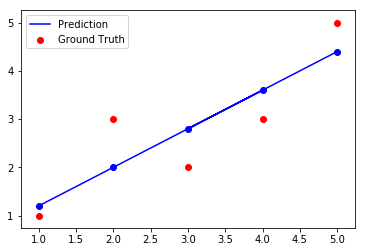

In [48]:
fig, ax = plt.subplots(1, 1)
ax.plot(x,predictions, c='b', label='Prediction')
ax.scatter(x,predictions, c='b')
ax.scatter(x,y, c='r',label='Ground Truth',)
plt.legend()

# Estimating Error

We can calculate an error score for our predictions called the Root Mean Squared Error or
RMSE <br/>
<img src="SLR_RMSE_Expression.jpg" >

In [49]:
predictions

array([1.2, 2. , 3.6, 2.8, 4.4])

In [50]:
y

array([1, 3, 3, 2, 5])

In [33]:
print("Error for predicted values : ", predictions - y)
print("Squared error for predicted values : ", (predictions - y)**2)
RMSE = math.sqrt(((predictions - y)**2).sum() / len(x))
print("RMSE or Each prediction is on average wrong by about : ", RMSE)

Error for predicted values :  [ 0.2 -1.   0.6  0.8 -0.6]
Squared error for predicted values :  [0.04 1.   0.36 0.64 0.36]
RMSE or Each prediction is on average wrong by about :  0.692820323027551


# Shortcut

The calculation of B1 can be re-written as <br/>
<img src="SLR_B1_Expression_1.jpg" >

In [40]:
np.corrcoef(x,y)[0,1] * (y.std() / x.std())

0.8